In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv("Student_Performance.csv")

In [23]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [24]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 429.8+ KB


In [26]:
df.shape


(10000, 6)

In [27]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].map({"Yes":1,"No":0})

In [28]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [29]:
%pip install seaborn

In [30]:
import seaborn as sns

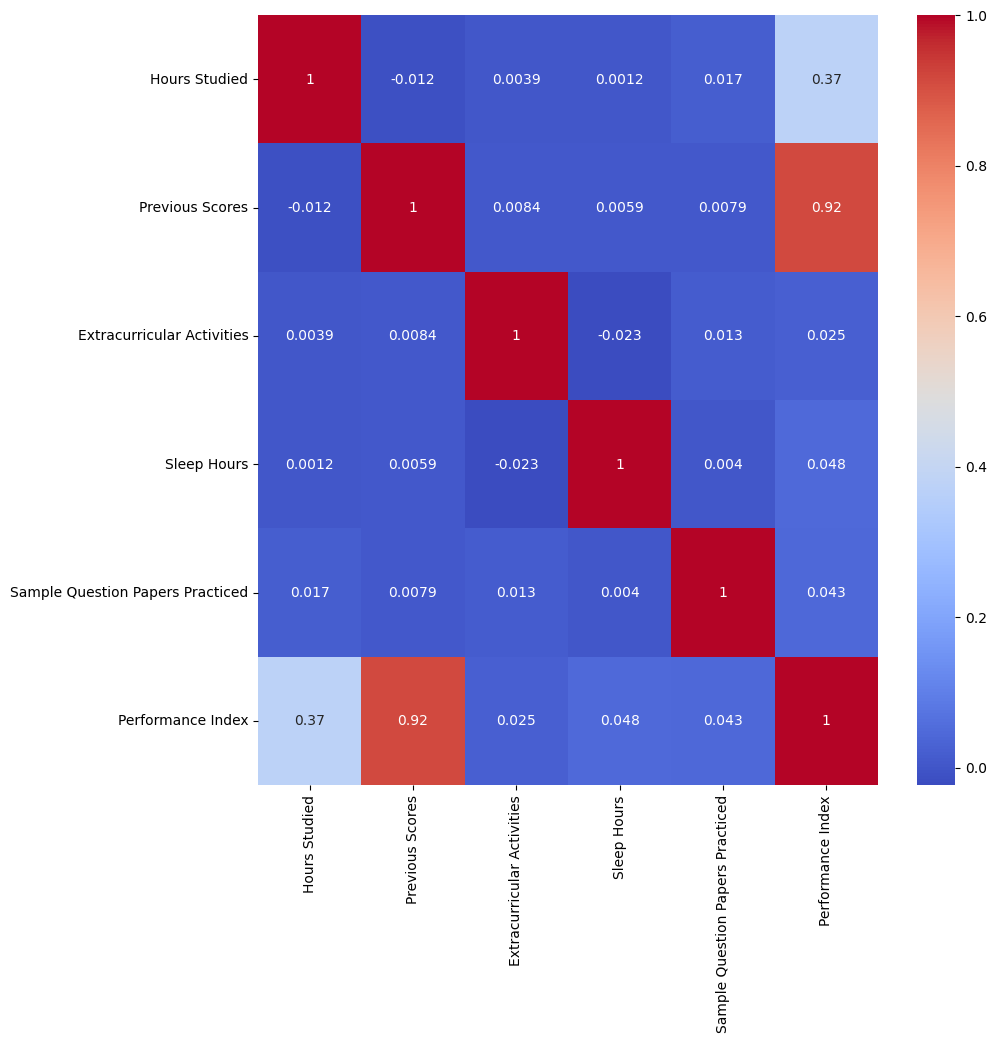

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [33]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [34]:
x = df.drop("Performance Index", axis=1)
y = df["Performance Index"] 

In [35]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print("VIF Values:")
print(vif_data)

VIF Values:
                            Feature        VIF
0                     Hours Studied   4.263244
1                   Previous Scores  10.088586
2        Extracurricular Activities   1.928235
3                       Sleep Hours   9.833594
4  Sample Question Papers Practiced   3.350481


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [37]:
x_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8369,5,99,0,5,1
9722,2,43,0,8,6
6950,5,76,0,9,8
1919,6,92,1,6,1
5713,8,72,0,4,6
...,...,...,...,...,...
350,5,83,0,5,0
79,8,93,1,6,9
8039,6,80,1,4,7
6936,3,65,0,8,0


In [40]:
model = LinearRegression()

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
model.coef_

array([2.84506723, 1.01895883, 0.61280727, 0.47524307, 0.19313064])

In [43]:
y_pred = model.predict(x_test)

In [45]:
residue = y_pred - y_test

In [47]:
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
mse = mean_squared_error(y_test,y_pred)

In [49]:
mse

np.float64(4.240506963418063)

In [50]:
r2 = r2_score(y_test,y_pred)

In [51]:
r2

0.9885584617226375

In [52]:
import statsmodels.api as sm

x_with_const = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, x_with_const).fit()

# View the model summary (focus on the p-values column "P>|t|")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:15:07   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [53]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


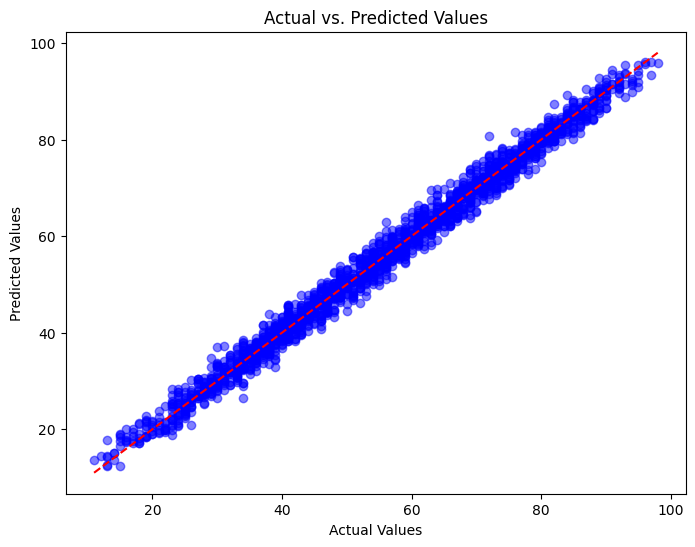

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
# Plot a red dashed line for perfect prediction (diagonal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
